# Termíny odevzdávání projektů
V tomto úkolu si projdeme a vizualizujeme to, v jakém pořadí jste odevzdávali první projekt a první dva bonusové úkoly.

In [14]:
###
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Načteme předzpracovaná data z informačního systému. Byla vytvořená z IS VUT pomocí Google Developer Tools.

Z důvodu ochrany vašeho soukromí byl váš login zahashován (se solí). Dataset ukazuje **datum posledního změny souborů**.

In [23]:
###
# Načteme dataset
df = pd.read_pickle("odevzdani.pkl.gz")
df

,points_bonus,date_bonus,date_str_bonus,points_proj1,date_proj1,date_str_proj1,login
0,2.0,2022-09-20 21:41:00,20.09.2022 21:41,18.00,2022-11-11 01:14:00,11.11.2022 01:14,201688813728540
1,2.0,2022-09-20 22:47:00,20.09.2022 22:47,18.00,2022-11-11 23:47:00,11.11.2022 23:47,107358053424364
2,1.3,2022-09-20 20:29:00,20.09.2022 20:29,NaN,NaT,,161288514832973
3,NaN,NaT,,20.00,2022-11-08 17:10:00,08.11.2022 17:10,85420641945012
4,1.6,2022-09-19 16:31:00,19.09.2022 16:31,19.75,2022-11-11 21:03:00,11.11.2022 21:03,153930022850151
...,...,...,...,...,...,...,...
167,2.0,2022-09-18 12:16:00,18.09.2022 12:16,20.00,2022-10-31 09:23:00,31.10.2022 09:23,269204023800761
168,1.6,2022-09-20 21:39:00,20.09.2022 21:39,12.00,2022-11-01 23:46:00,01.11.2022 23:46,192319765359212
169,2.0,2022-09-18 15:09:00,18.09.2022 15:09,20.00,2022-11-07 12:13:00,07.11.2022 12:13,55765881970675
170,1.7,2022-09-20 23:24:00,20.09.2022 23:24,3.60,2022-11-11 23:21:00,11.11.2022 23:21,32585867284123


Můžete všimnout *NaT* dat - Not a Time - obdoba NaN.

## Úkol 1: kdy se odevzdávaly projekty?

In [24]:
# Vytvoříme si kopii datasetu, seřadíme jej podle odevzdání prvního projektu
# vytvoříme pomocný sloupec a integrujeme
df2 = df.copy() ###
df2["odevzdano"] = 1
df2 = df2.sort_values("date_proj1")
df2["odevzdano"] = df2["odevzdano"].cumsum()
df2 ###

,points_bonus,date_bonus,date_str_bonus,points_proj1,date_proj1,date_str_proj1,login,odevzdano
9,2.0,2022-09-16 13:00:00,16.09.2022 13:00,19.0,2022-10-26 23:19:00,26.10.2022 23:19,98242297442043,1
159,1.6,2022-09-15 14:03:00,15.09.2022 14:03,19.9,2022-10-27 08:29:00,27.10.2022 08:29,209977084480812,2
79,2.0,2022-09-18 18:05:00,18.09.2022 18:05,19.5,2022-10-27 10:57:00,27.10.2022 10:57,142759917731551,3
18,2.0,2022-09-20 09:39:00,20.09.2022 09:39,20.0,2022-10-28 13:08:00,28.10.2022 13:08,91170931013765,4
161,2.0,2022-09-19 17:13:00,19.09.2022 17:13,16.5,2022-10-28 16:25:00,28.10.2022 16:25,42256391836088,5
...,...,...,...,...,...,...,...,...
122,2.0,2022-09-16 17:28:00,16.09.2022 17:28,NaN,NaT,,29828999967271,168
129,2.0,2022-09-19 14:00:00,19.09.2022 14:00,NaN,NaT,,253921167566245,169
131,NaN,NaT,,NaN,NaT,,281221121094,170
146,NaN,NaT,,NaN,NaT,,238046928560418,171


xticks [19292. 19294. 19296. 19297. 19299. 19301. 19303. 19305. 19307.]


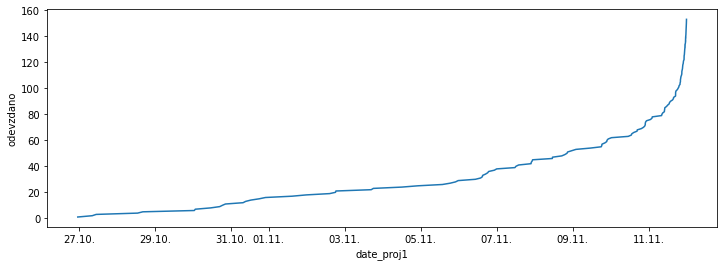

In [25]:
# Zobrazíme data pomocí seabornu
plt.figure(figsize=(12, 4)) ###
ax = sns.lineplot(data=df2, x="date_proj1", y="odevzdano")

# trik pro změnu formátování 
xticks = ax.get_xticks() ###
print("xticks", xticks) ###
ax.set_xticks(xticks) ###
ax.set_xticklabels([pd.to_datetime(tm, unit='d').strftime('%d.%m.') for tm in xticks]) ###
plt.show() ###

In [26]:
# a ted chceme vsechny tri projekty
# muzeme pracovat na urovni dnu - kolik bylo ktery den odevzdano projektu?
display(df.resample("D", on="date_bonus").agg({"login": "count"}))
display(df.resample("D", on="date_proj1").agg({"login": "count"}))

,login
date_bonus,
2022-09-15,10
2022-09-16,9
2022-09-17,3
2022-09-18,15
2022-09-19,39
2022-09-20,39


,login
date_proj1,
2022-10-26,1
2022-10-27,2
2022-10-28,2
2022-10-29,0
2022-10-30,6
2022-10-31,5
2022-11-01,2
2022-11-02,3
2022-11-03,2


In [27]:
# Je mozne to udelat nějak dohromady?
# převedeme tabulku na stacked format
# vytvoříme sloupec cnt
# uděláme groupby
# a s nějakým krokem  resamplujeme a zjisíme počet
# na konec resetujeme index
df3 = df.melt([],  ["date_bonus", "date_proj1"]).eval("cnt=1").groupby(
    "variable").resample("1D", on="value").count()["cnt"].reset_index()  # todo nahradit za 4H
df3


,variable,value,cnt
0,date_bonus,2022-09-15,10
1,date_bonus,2022-09-16,9
2,date_bonus,2022-09-17,3
3,date_bonus,2022-09-18,15
4,date_bonus,2022-09-19,39
5,date_bonus,2022-09-20,39
6,date_proj1,2022-10-26,1
7,date_proj1,2022-10-27,2
8,date_proj1,2022-10-28,2
9,date_proj1,2022-10-29,0


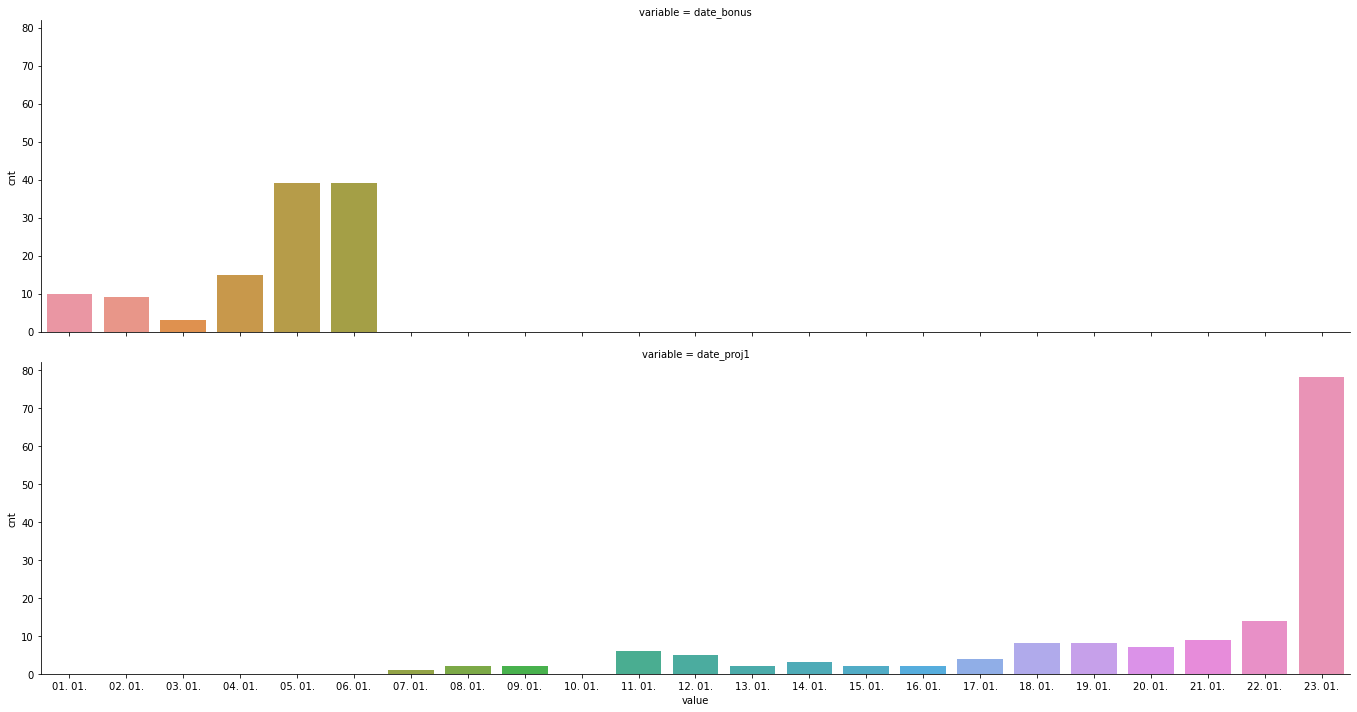

In [28]:
# a ted chceme oba projekty
g = sns.catplot(data = df3, x="value", y="cnt", row="variable", kind="bar", aspect=4)

for ax in g.axes.flat: ###
    xticks = ax.get_xticks() ###
    ax.set_xticklabels([pd.to_datetime(tm, unit='d').strftime('%d. %m.') for tm in xticks]) ###


## Úkol 2: kolik bylo odevzdáno projektů každý den?

In [29]:
# do df3 vytvoříme sloupec total, který bude odpovídat celkovému počtu
df3["total"] = df3.groupby("variable")["cnt"].cumsum()
df3

,variable,value,cnt,total
0,date_bonus,2022-09-15,10,10
1,date_bonus,2022-09-16,9,19
2,date_bonus,2022-09-17,3,22
3,date_bonus,2022-09-18,15,37
4,date_bonus,2022-09-19,39,76
5,date_bonus,2022-09-20,39,115
6,date_proj1,2022-10-26,1,1
7,date_proj1,2022-10-27,2,3
8,date_proj1,2022-10-28,2,5
9,date_proj1,2022-10-29,0,5


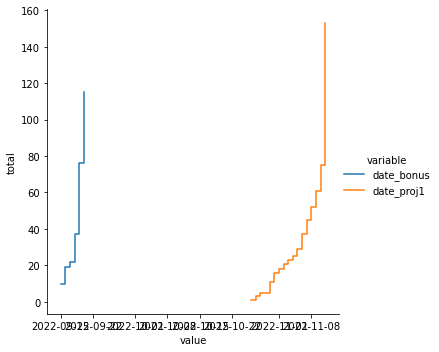

In [30]:
# vykreslíme graf
# pomocí drawstyle="steps-post" z lineárního grafu uděláme schodovitý
sns.relplot(data=df3, kind="line", x="value", y="total", hue="variable", 
     drawstyle="steps-post") # todo: zmenit cetnost na 4 hodiny

## Úkol 3: odevzdávaly se úkoly na poslední chvíli?

In [31]:
###
# vytvořme si dataset deadlinů jednotlivých projektů
df_terminy = pd.DataFrame(
    {
        "proj": ["date_bonus", "date_proj1"],
        "deadline": [
            np.datetime64("2022-09-20T23:59:59"),
            np.datetime64("2022-11-12T23:59:59")
        ]
    }
)
df_terminy



,proj,deadline
0,date_bonus,2022-09-20 23:59:59
1,date_proj1,2022-11-12 23:59:59


In [32]:
# Vytvořme df4, který:
# bude zase stacked
# a přidáme mu sloupec deadline (pomocí merge)
df4 = df.melt(["login"], ["date_bonus", "date_proj1"]).merge(
    df_terminy, left_on="variable", right_on="proj")

#  vytvoříme sloupec reserve, který bude říkat, jaká byla časová rezerv
# a také sloupec reserve_days, který přepočítá tuto hodnotu na dny (float číslo)
df4["reserve"] = df4["deadline"] - df4["value"]
df4["reserve_days"] = df4["reserve"] / np.timedelta64(1, 'D')

df4 

,login,variable,value,proj,deadline,reserve,reserve_days
0,201688813728540,date_bonus,2022-09-20 21:41:00,date_bonus,2022-09-20 23:59:59,0 days 02:18:59,0.096516
1,107358053424364,date_bonus,2022-09-20 22:47:00,date_bonus,2022-09-20 23:59:59,0 days 01:12:59,0.050683
2,161288514832973,date_bonus,2022-09-20 20:29:00,date_bonus,2022-09-20 23:59:59,0 days 03:30:59,0.146516
3,85420641945012,date_bonus,NaT,date_bonus,2022-09-20 23:59:59,NaT,NaN
4,153930022850151,date_bonus,2022-09-19 16:31:00,date_bonus,2022-09-20 23:59:59,1 days 07:28:59,1.311794
...,...,...,...,...,...,...,...
339,269204023800761,date_proj1,2022-10-31 09:23:00,date_proj1,2022-11-12 23:59:59,12 days 14:36:59,12.609016
340,192319765359212,date_proj1,2022-11-01 23:46:00,date_proj1,2022-11-12 23:59:59,11 days 00:13:59,11.009711
341,55765881970675,date_proj1,2022-11-07 12:13:00,date_proj1,2022-11-12 23:59:59,5 days 11:46:59,5.490961
342,32585867284123,date_proj1,2022-11-11 23:21:00,date_proj1,2022-11-12 23:59:59,1 days 00:38:59,1.027072


In [35]:
###
# a koreluje termín odevzdání?
df5 = df4.pivot(index="login", columns="proj", values="reserve_days")
df5



proj,date_bonus,date_proj1
login,,
100334954408895,1.029155,4.131238
101567505061787,NaN,1.054850
102168504115218,0.040266,1.124988
104603929404998,1.292350,1.195822
105588162365570,1.372211,NaN
...,...,...
96319110321714,NaN,1.346516
9730967436385,NaN,NaN
97372179066740,NaN,7.082627


Pomohlo dřívejší odevzdání lepšímu bodovému hodnocení?

[Text(0.5, 32.99999999999995, 'Body'),
 Text(27.0, 0.5, 'Rezerva odevzdání [dny]'),
 (0.0, 17.829814814814814)]

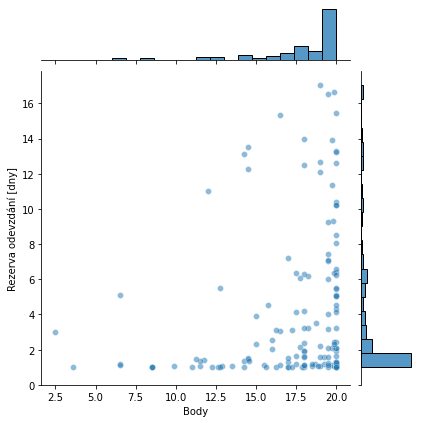

In [36]:
####
df6 = pd.merge(df[["login", "points_bonus", "points_proj1"]], df5, left_on="login", right_index=True)
df6
g = sns.jointplot(data=df6, x="points_proj1", y="date_proj1", 
    alpha=0.5,
    marginal_kws=dict(bins=20))

g.ax_joint.set(xlabel="Body", ylabel="Rezerva odevzdání [dny]", ylim=(0, None))